In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df=pd.read_csv('players_stats_by_season_full_details.csv')
df = df.drop(['height', 'weight'] , axis=1)
df.head()

,League,Season,Stage,Player,Team,GP,MIN,FGM,FGA,3PM,...,STL,BLK,PTS,birth_year,birth_month,birth_date,height_cm,weight_kg,nationality,high_school
0,NBA,2009 - 2010,Regular_Season,Kevin Durant,OKC,82,3239.3,794,1668,128,...,112,84,2472,1988.0,Sep,"Sep 29, 1988",206.0,109.0,United States,Montrose Christian School
1,NBA,2009 - 2010,Regular_Season,LeBron James,CLE,76,2965.6,768,1528,129,...,125,77,2258,1984.0,Dec,"Dec 30, 1984",203.0,113.0,United States,St. Vincent St. Mary High School
2,NBA,2009 - 2010,Regular_Season,Dwyane Wade,MIA,77,2792.4,719,1511,73,...,142,82,2045,1982.0,Jan,"Jan 17, 1982",193.0,100.0,United States,Harold L. Richards High School
3,NBA,2009 - 2010,Regular_Season,Dirk Nowitzki,DAL,81,3038.8,720,1496,51,...,70,79,2027,1978.0,Jun,"Jun 19, 1978",213.0,111.0,Germany,NaN
4,NBA,2009 - 2010,Regular_Season,Kobe Bryant,LAL,73,2835.4,716,1569,99,...,113,20,1970,1978.0,Aug,"Aug 23, 1978",198.0,96.0,United States,Lower Merion High School


In [10]:
df.columns

Index(['League', 'Season', 'Stage', 'Player', 'Team', 'GP', 'MIN', 'FGM',
       'FGA', '3PM', '3PA', 'FTM', 'FTA', 'TOV', 'PF', 'ORB', 'DRB', 'REB',
       'AST', 'STL', 'BLK', 'PTS', 'birth_year', 'birth_month', 'birth_date',
       'height_cm', 'weight_kg', 'nationality', 'high_school'],
      dtype='object')

In [18]:
df.isnull().sum()

League             0
Season             0
Stage              0
Player             0
Team              11
GP                 0
MIN                0
FGM                0
FGA                0
3PM                0
3PA                0
FTM                0
FTA                0
TOV                0
PF                 0
ORB                0
DRB                0
REB                0
AST                0
STL                0
BLK                0
PTS                0
birth_year       316
birth_month      316
birth_date       316
height_cm         74
weight_kg       4202
nationality        5
high_school    25963
dtype: int64

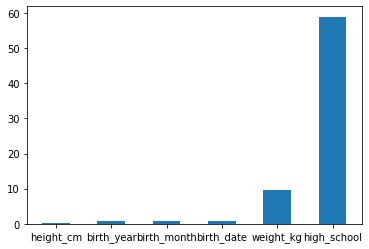

,column,percent
25,height_cm,0.17
22,birth_year,0.72
23,birth_month,0.72
24,birth_date,0.72
26,weight_kg,9.54
28,high_school,58.92


In [52]:
#percent of NaNs for every column

missed = pd.DataFrame()
missed['column'] = df.columns
percent = []
for col in df.columns:
    percent.append(round(100* df[col].isnull().sum() / len(df), 2))
missed['percent'] = percent
missed = missed.sort_values('percent')
missed = missed[missed['percent']>0.1]
plt.bar(missed['column'], missed['percent'], width=0.5, bottom=None )
plt.show()

In [55]:
ds = df['League'].value_counts().reset_index()
ds.columns = ['league', 'number of samples']

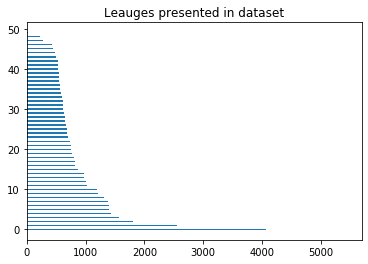

<Figure size 12960x28800 with 0 Axes>

,league,number of samples
0,NBA,4070
1,Eurocup,2556
2,Euroleague,1803
3,Spanish-ACB,1566
4,Chinese-CBA,1426
5,German-BBL,1397
6,Australian-NBL,1397
7,FIBA-Europe-Cup,1388
8,French-Jeep-Elite,1313
9,Italian-Lega-Basket-Serie-A,1203


In [110]:
#leagues presented in dataset
plt.barh( ds.index, ds['number of samples'],  height=0.3)
plt.title('Leauges presented in dataset')
plt.xlim(0,np.max(ds['number of samples'])*1.4)
plt.figure(figsize=(180,400))
plt.tight_layout()
plt.show()
ds

In [96]:
ds1 = df['Season'].value_counts().reset_index()
ds1.columns = ['Season', 'number of samples']

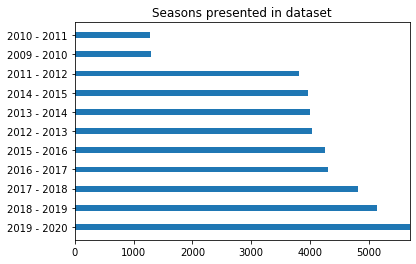

<Figure size 12960x28800 with 0 Axes>

,Season,number of samples
0,2019 - 2020,7116
1,2018 - 2019,5144
2,2017 - 2018,4820
3,2016 - 2017,4317
4,2015 - 2016,4257
5,2012 - 2013,4038
6,2013 - 2014,4001
7,2014 - 2015,3965
8,2011 - 2012,3823
9,2009 - 2010,1303


In [109]:
#Seasons presented in dataset
plt.barh( ds1['Season'], ds1['number of samples'],  height=0.3)
plt.title('Seasons presented in dataset')
plt.xlim(0,np.max(ds['number of samples'])*1.4)
plt.figure(figsize=(180,400))
plt.tight_layout()
plt.show()
ds1

In [101]:
ds2 = df['Stage'].value_counts().reset_index()
ds2.columns = ['Stage', 'number of samples']
ds2

,Stage,number of samples
0,International,39996
1,Regular_Season,2604
2,Playoffs,1466


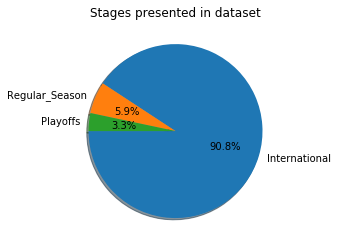

In [116]:
#Stage presented in dataset
plt.pie( ds2['number of samples'], labels=ds2['Stage'], autopct='%.1f%%',
        shadow=True, startangle=180)
plt.title('Stages presented in dataset')
plt.show()

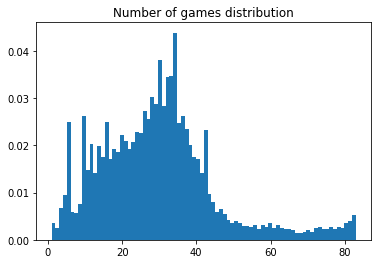

In [124]:
# how many games sportsmen played?
plt.hist(df['GP'], bins= 80, density = True)
plt.title('Number of games distribution')
plt.show()

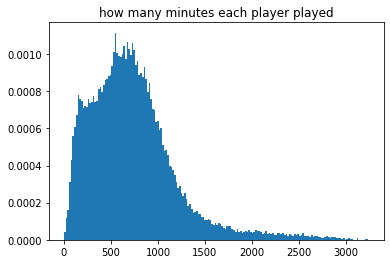

In [126]:
plt.hist(df['MIN'], bins= 180, density = True)
plt.title('how many minutes each player played')
plt.show()

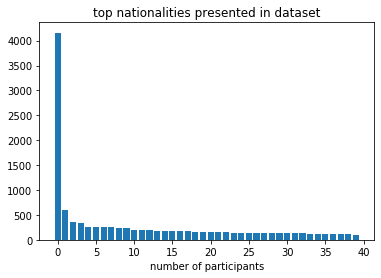

In [142]:
#check nationalities
ds = df.groupby(['Player', 'nationality'])['Team'].count().reset_index()
ds = ds['nationality'].value_counts().reset_index()
ds.columns = ['nationality', 'number of samples']
ds = ds.sort_values(['number of samples'])
ds = ds.tail(40)
plt.bar( ds.index, ds['number of samples'])
plt.title('top nationalities presented in dataset')
plt.xlabel('nationality index')
plt.xlabel('number of participants')
plt.show()
